In [5]:
import pandas as pd

In [10]:
import geopandas as gpd
import fiona
from fiona.drvsupport import supported_drivers

In [33]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [17]:
#Import KML Driver
#gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
#supported_drivers['LIBKML'] = 'rw'
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

### Hospitals Data

Downloaded from: https://geoportal.hawaii.gov/datasets/hospitals-1/explore?location=20.639400%2C-157.361100%2C8.61&showTable=true

* `Description`: Locations of hospitals in the State of Hawaii as of November 2021. 
* `Source`:  State Department of Health, Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Name:  Facility Name 
Licensed_Beds: Licensed Bed Count
Island: Island
Mailing_Address: Mailing Address
Physical_Address: Physical Address
Phone: Phone Number
Alt_Phone: Alternative Phone Number
Fax: Fax
POC: Point of Contact
Website: Website
Accred_Status: Accreditation Status* (TJC, N/A)
Cert_Status: Certification Status
Critical_Access_Hosp: Critical Access Hospital ** (Yes, No)
Provider Number: Provider Number 
```

In [12]:
# Tabular data    
data = pd.read_csv("data/hospitals/Hospitals.csv")
data.head(3)

,X,Y,objectid,name,licensed_beds,island,mailing_address,physical_address,phone,alt_phone,fax,poc,website,accred_status,cert_status,critical_access_hosp,provider_num
0,-157.757104,21.381406,1,ADVENTIST HEALTH CASTLE,160,OAHU,"640 Ulukahiki Street, Kailua, Hawaii 96734","640 Ulukahiki Street, Kailua, Hawaii 96734",(808) 263-5500,NaN,(808) 263-5123,"Kathy Raethel, President/CEO",https://www.adventisthealth.org/castle/,TJC,X,NaN,120006.0
1,-155.470496,20.076394,2,HALE HO’OLA HAMAKUA,11,HAWAII,"45-547 Plumeria Street, Honokaa, Hawaii 96727","45-547 Plumeria Street, Honokaa, Hawaii 96727",(808) 932-4100,NaN,(808) 775-9977,"David A. Culbreth, Administrator",https://www.halehoolahamakua.org/,NaN,X,X,121307.0
2,-157.810021,21.409491,3,HAWAII STATE HOSPITAL,202,OAHU,"45-710 Keaahala Road, Kaneohe, Hawaii 96744","45-710 Keaahala Road, Kaneohe, Hawaii 96744",(808) 247-2191,NaN,(808) 247-7335,"Run F. Heidelberg, DNP, APRN-RX, Administrator",https://health.hawaii.gov/,TJC,NaN,NaN,NaN


In [13]:
# geojson    

data = gpd.read_file("data/hospitals/Hospitals.geojson")
df.head

<bound method NDFrame.head of     objectid                                             name  licensed_beds  \
0          1                          ADVENTIST HEALTH CASTLE            160   
1          2                              HALE HO’OLA HAMAKUA             11   
2          3                            HAWAII STATE HOSPITAL            202   
3          4                              HILO MEDICAL CENTER            166   
4          5                                      KAHI MOHALA             88   
5          6                            KAHUKU MEDICAL CENTER             21   
6          7                       KAISER FOUNDATION HOSPITAL            295   
7          8  KAPIOLANI MEDICAL CENTER for WOMEN and CHILDREN            253   
8          9                                     KAU HOSPITAL             21   
9         10                 KAUAI VETERANS MEMORIAL HOSPITAL             25   
10        11                                  KOHALA HOSPITAL              6   
11        

In [18]:
#KML
df2 = gpd.read_file("data/hospitals/Hospitals.kml", driver="KML")

In [19]:
df2.head(5)

,Name,Description,geometry
0,ADVENTIST HEALTH CASTLE,,POINT (-157.75710 21.38141)
1,HALE HO’OLA HAMAKUA,,POINT (-155.47050 20.07639)
2,HAWAII STATE HOSPITAL,,POINT (-157.81002 21.40949)
3,HILO MEDICAL CENTER,,POINT (-155.11298 19.71753)
4,KAHI MOHALA,,POINT (-158.02605 21.37181)


### Adult Residential Care Homes Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::adult-residential-care-homes/about

* `Description`: Locations of adult residential care homes in the State of Hawaii as of November 2021. 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Facility_Name: Facility Name
Facility_Type: Facility Type (definitions below)
Licensee: Name of License Holder
Address: Facility Address
City: City
State: State
Island: Island
Phone: Phone Number
License_Num: License Number
License_Exp: License Expiration
Males: # of male vacancies in the facility (Nov 2021)
Females: # of female vacancies in the facility (Nov 2021)
Capacity: Overall Capacity of the Facility
Amb_Type: Ambulatory Type (definitions below)
Wheelchair_Appr: Is Facility Wheelchair Approved? (Yes or no)
Diet_Type: Type of Diet Approved in Facility (Regular or Special)
```

In [20]:
# Tabular data    
data1 = pd.read_csv("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.csv")
data1.head(3)

,X,Y,objectid,facility_name,facility_type,licensee,address,city,state,island,phone,license_num,license_exp,males,females,capacity,amb_type,wheelchair_appr,diet_type
0,-157.864657,21.344071,1,3 J's,Type I Expanded Adult Residential Care Home,Geronimo Castillo,1624 Perry Street,Honolulu,Hawaii,Oahu,8.088487e+09,1334-C,2022/07/31 00:00:00+00,2.0,1.0,5.0,Ambulatory,Yes,Special
1,-157.947627,21.387788,2,808 Adult Residential Care Home/Expanded Care LLC,Type I Expanded Adult Residential Care Home,Novelyn Llarenas,98-209 Kanuku Street,Aiea,Hawaii,Oahu,8.087000e+09,1344-C,2022/08/31 00:00:00+00,0.0,1.0,5.0,Ambulatory,Yes,Special
2,-157.934424,21.382605,3,888 Adult Residential Care Home,Type I Expanded Adult Residential Care Home,Victor Laforteza,98-550 Kaamilo Street,Aiea,Hawaii,Oahu,8.088884e+09,1647-C,2022/03/31 00:00:00+00,NaN,NaN,5.0,NaN,No,NaN


In [21]:
#geojson

df_adult_care_homes = gpd.read_file("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.geojson")
df_adult_care_homes.head(3)

,objectid,facility_name,facility_type,licensee,address,city,state,island,phone,license_num,license_exp,males,females,capacity,amb_type,wheelchair_appr,diet_type,geometry
0,1,3 J's,Type I Expanded Adult Residential Care Home,Geronimo Castillo,1624 Perry Street,Honolulu,Hawaii,Oahu,8.088487e+09,1334-C,2022-07-31 00:00:00+00:00,2.0,1.0,5.0,Ambulatory,Yes,Special,POINT (-157.86466 21.34407)
1,2,808 Adult Residential Care Home/Expanded Care LLC,Type I Expanded Adult Residential Care Home,Novelyn Llarenas,98-209 Kanuku Street,Aiea,Hawaii,Oahu,8.087000e+09,1344-C,2022-08-31 00:00:00+00:00,0.0,1.0,5.0,Ambulatory,Yes,Special,POINT (-157.94763 21.38779)
2,3,888 Adult Residential Care Home,Type I Expanded Adult Residential Care Home,Victor Laforteza,98-550 Kaamilo Street,Aiea,Hawaii,Oahu,8.088884e+09,1647-C,2022-03-31 00:00:00+00:00,NaN,NaN,5.0,None,No,None,POINT (-157.93442 21.38260)


In [22]:
#KML
df2_adult_care_homes = gpd.read_file("data/Adult_Residential_Care_Homes/Adult_Residential_Care_Homes.kml", driver="KML")
df2_adult_care_homes.head(3)

,Name,Description,geometry
0,,,POINT (-157.86466 21.34407)
1,,,POINT (-157.94763 21.38779)
2,,,POINT (-157.93442 21.38260)


### Assisted Living Facilities Data

Downloaded from: https://geoportal.hawaii.gov/datasets/HiStateGIS::assisted-living-facilities/about

* `Description`: Locations of adult residential care homes in the State of Hawaii as of November 2021. 
* `Source`:  Hawaii State Department of Health Office of Health Care Assurance (OHCA).
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml

```
Facility_Name: Facility Name
Facility_Type: Facility Type (definitions below)
Licensee: Name of License Holder
Address: acility Address
City:City
State:State
Island:Island
Phone:Phone Number
License_Num:License Number
License_Exp:License Expiration
Males:# of male vacancies in the facility (Nov 2021)
Females:# of female vacancies in the facility (Nov 2021)
Capacity:Overall Capacity of the Facility
Amb_Type:Ambulatory Type (definitions below)
Wheelchair_Appr: Is Facility Wheelchair Approved? (Yes or no)
Diet_Type: Type of Diet Approved in Facility (Regular or Special)
```

In [23]:
# Tabular data    
data3 = pd.read_csv("data/assisted living facilities/Assisted_Living_Facilities.csv")
data3.head(3)

,X,Y,objectid,name,address,city,zipcode,island,phone_num,license_exp,license_num
0,-157.848743,21.323116,1,15 Craigside,15 Craigside Place,Honolulu,96817,Oahu,8085237000,2022/06/30 00:00:00+00,16-ALF
1,-157.833433,21.301697,2,Arcadia Retirement Residence,1434 Punahou Street,Honolulu,96822,Oahu,8089410941,2023/08/31 00:00:00+00,1-ALF
2,-157.716056,21.292595,3,Hawaii Kai Retirement Comm Phase I and II,428 Kawaihae Street,Honolulu,96825,Oahu,8083959599,2022/04/30 00:00:00+00,12-ALF


In [24]:
#geojson
df3_assisted_living_facilities = gpd.read_file("data/assisted living facilities/Assisted_Living_Facilities.kml", driver="KML")
df3_assisted_living_facilities.head(3)

,Name,Description,geometry
0,15 Craigside,,POINT (-157.84874 21.32312)
1,Arcadia Retirement Residence,,POINT (-157.83343 21.30170)
2,Hawaii Kai Retirement Comm Phase I and II,,POINT (-157.71606 21.29260)


### Age of Structure Data
#### Year Structure Built

Downloaded from: https://data.census.gov/table/ACSDT5Y2019.B25034g=040XX00US15$1500000&y=2019&tid=ACSDT5Y2019.B25034

* `Description`: Year structure built 
* `Source`:  U.S. Census Bureau, 2015-2019 American Community Survey 5-Year Estimates
* `Data formats available`: csv
* `GEO_ID`: 1500000US150010201001 (FIPS code 1500000US:Country, 15:Hawaii State, 001:County, 02010:Census Track,01:Blockgroup)

```
Column Name	Label
GEO_ID	Geography
NAME	Geographic Area Name
B25034_001E	Estimate Total:
B25034_001M	Margin of Error Total:
B25034_002E	Estimate Total: Built 2014 or later
B25034_002M	Margin of Error Total: Built 2014 or later
B25034_003E	Estimate Total: Built 2010 to 2013
B25034_003M	Margin of Error Total: Built 2010 to 2013
B25034_004E	Estimate Total: Built 2000 to 2009
B25034_004M	Margin of Error Total: Built 2000 to 2009
B25034_005E	Estimate Total: Built 1990 to 1999
B25034_005M	Margin of Error Total: Built 1990 to 1999
B25034_006E	Estimate Total: Built 1980 to 1989
B25034_006M	Margin of Error Total: Built 1980 to 1989
B25034_007E	Estimate Total: Built 1970 to 1979
B25034_007M	Margin of Error Total: Built 1970 to 1979
B25034_008E	Estimate Total: Built 1960 to 1969
B25034_008M	Margin of Error Total: Built 1960 to 1969
B25034_009E	Estimate Total: Built 1950 to 1959
B25034_009M	Margin of Error Total: Built 1950 to 1959
B25034_010E	Estimate Total: Built 1940 to 1949
B25034_010M	Margin of Error Total: Built 1940 to 1949
B25034_011E	Estimate Total: Built 1939 or earlier
B25034_011M	Margin of Error Total: Built 1939 or earlier
```

In [26]:
data4 = pd.read_csv('data/age of structure/ACSDT5Y2019.B25034-Data.csv')
data4.head(4)

,GEO_ID,NAME,B25034_001E,B25034_001M,B25034_002E,B25034_002M,B25034_003E,B25034_003M,B25034_004E,B25034_004M,...,B25034_007M,B25034_008E,B25034_008M,B25034_009E,B25034_009M,B25034_010E,B25034_010M,B25034_011E,B25034_011M,Unnamed: 24
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Built 2014 or later,Margin of Error!!Total:!!Built 2014 or later,Estimate!!Total:!!Built 2010 to 2013,Margin of Error!!Total:!!Built 2010 to 2013,Estimate!!Total:!!Built 2000 to 2009,Margin of Error!!Total:!!Built 2000 to 2009,...,Margin of Error!!Total:!!Built 1970 to 1979,Estimate!!Total:!!Built 1960 to 1969,Margin of Error!!Total:!!Built 1960 to 1969,Estimate!!Total:!!Built 1950 to 1959,Margin of Error!!Total:!!Built 1950 to 1959,Estimate!!Total:!!Built 1940 to 1949,Margin of Error!!Total:!!Built 1940 to 1949,Estimate!!Total:!!Built 1939 or earlier,Margin of Error!!Total:!!Built 1939 or earlier,NaN
1,1500000US150010201001,"Block Group 1, Census Tract 201, Hawaii County...",977,114,3,4,2,3,64,34,...,45,164,51,148,50,84,88,52,22,NaN
2,1500000US150010201002,"Block Group 2, Census Tract 201, Hawaii County...",454,101,4,7,0,11,99,75,...,19,8,9,12,11,64,24,94,60,NaN
3,1500000US150010201003,"Block Group 3, Census Tract 201, Hawaii County...",272,76,0,11,0,11,41,39,...,50,10,15,3,5,0,11,42,40,NaN


### Sea Level Rise Exposure Data - 1.1 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/search?collection=Dataset&groupIds=a247b90d2fd14f60a64c0c75db5d5731

* `Description`: Estimated extent of chronic flooding due to multiple coastal hazards, modeled using a 1.1 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [27]:
data5 = pd.read_csv('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.csv')
data5.head(3)

,objectid,id,st_areashape,st_perimetershape
0,1,1,1.626753e+07,1.365255e+06
1,2,0,1.185934e+07,1.023204e+06
2,3,1,1.223127e+06,1.830724e+05


In [30]:
data6 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.geojson')
data6.head()

,objectid,id,st_areashape,st_perimetershape,geometry
0,1,1,1.626753e+07,1.365255e+06,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,2,0,1.185934e+07,1.023204e+06,"MULTIPOLYGON (((-159.78249 22.05861, -159.7824..."
2,3,1,1.223127e+06,1.830724e+05,"MULTIPOLYGON (((-156.93192 20.92210, -156.9322..."
3,4,0,7.960696e+06,7.450346e+05,"MULTIPOLYGON (((-156.50022 20.79772, -156.5002..."
4,5,1,3.803924e+06,4.277066e+05,"MULTIPOLYGON (((-157.14802 21.09239, -157.1480..."


In [32]:
data7 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario.kml')
data7.head(3)

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,,,"MULTIPOLYGON (((-159.78249 22.05861, -159.7824..."
2,,,"MULTIPOLYGON (((-156.93192 20.92210, -156.9322..."


<Axes: >

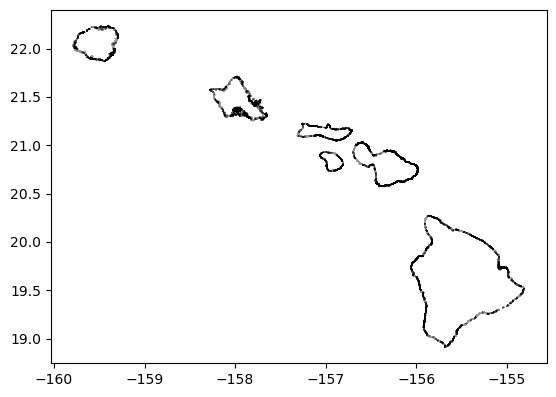

In [51]:
data8 = gpd.read_file('data/sea_level_rise_exposure/1.1ft/SLR_Exposure_Area_-_1.1_Ft._Scenario_ShapeFile')
data8.plot(alpha=.4, color='gray', edgecolor='black')

### Sea Level Rise Exposure Data - 2.0 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/search?collection=Dataset&groupIds=a247b90d2fd14f60a64c0c75db5d5731

* `Description`: Estimated extent of chronic flooding due to multiple coastal hazards, modeled using a 2.0 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [44]:
data9 = pd.read_csv('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.csv')
data9.head(3)

,objectid,id,st_areashape,st_perimetershape
0,1,1,1.742507e+07,1.420933e+06
1,2,0,1.613553e+07,1.082830e+06
2,3,1,1.337530e+06,1.904737e+05


In [45]:
data10 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.geojson')
data10.head()

,objectid,id,st_areashape,st_perimetershape,geometry
0,1,1,1.742507e+07,1.420933e+06,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,2,0,1.613553e+07,1.082830e+06,"MULTIPOLYGON (((-159.78216 22.06026, -159.7821..."
2,3,1,1.337530e+06,1.904737e+05,"MULTIPOLYGON (((-156.91505 20.91916, -156.9150..."
3,4,0,9.846578e+06,8.195439e+05,"MULTIPOLYGON (((-156.50200 20.79698, -156.5020..."
4,5,1,6.620965e+06,6.483648e+05,"MULTIPOLYGON (((-157.11872 21.09841, -157.1187..."


In [46]:
data11 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario.kml')
data11.head(3)

,Name,Description,geometry
0,,,"MULTIPOLYGON (((-155.34006 19.22734, -155.3401..."
1,,,"MULTIPOLYGON (((-159.78216 22.06026, -159.7821..."
2,,,"MULTIPOLYGON (((-156.91505 20.91916, -156.9150..."


<Axes: >

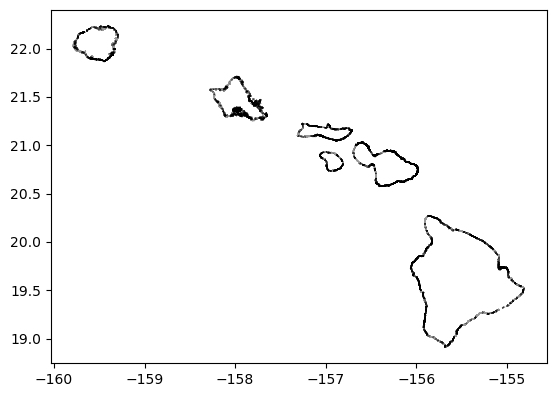

In [50]:
data12 = gpd.read_file('data/sea_level_rise_exposure/2.0ft/SLR_Exposure_Area_-_2.0_Ft._Scenario_ShapeFile')
data12.plot(alpha=.4, color='gray', edgecolor='black')

### Sea Level Rise Potential Flooded Highways Data - 1.1 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/datasets/a3116b61d7b04cc6ba3ea10e632f991a_69/explore?location=21.472056%2C-158.059600%2C9.40

* `Description`: Estimated annual high wave flooding, modeled using a 1.1 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: st fullname, Highway fullname, lengthshape, Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

```

```

In [52]:
data13 = pd.read_csv('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario.csv')
data13.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rf_addr,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape
0,1,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18399,18359,0,0,0,Y,N,1,KAUMUALII HWY,176.605698
1,2,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18099,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315
2,3,678,1311,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,17999,17901,0,0,0,Y,N,1,KAUMUALII HWY,271.462677


In [53]:
data14 = gpd.read_file('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario.geojson')
data14.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape,geometry
0,1,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18359,0,0,0,Y,N,1,KAUMUALII HWY,176.605698,"MULTILINESTRING ((-159.71338 21.96639, -159.71..."
1,2,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315,"LINESTRING (-159.71946 21.96874, -159.72162 21..."
2,3,678,1311,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,17901,0,0,0,Y,N,1,KAUMUALII HWY,271.462677,"LINESTRING (-159.72162 21.96938, -159.72413 21..."


<Axes: >

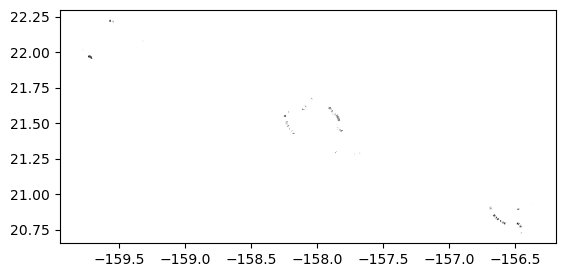

In [57]:
data15 = gpd.read_file('data/slr potential flooded highways/1.1ft/SLR_Potential_Flooded_Highways_-_1.1_Ft._Scenario')
data15.plot(alpha=1, color='black', edgecolor='black')

### Sea Level Rise Potential Flooded Highways Data - 2.0 Ft. Scenario

Downloaded from: https://geoportal.hawaii.gov/datasets/fd3ec2b57f734fe6aea7a066a81eb8b7_70/explore

* `Description`: Estimated annual high wave flooding, modeled using a 2.0 foot sea level rise scenario. 
* `Source`:  Hawaii Statewide GIS Program Open Data Site 
* `Lowest Geographic Scale`: st fullname, Highway fullname, lengthshape, Multipolygon, Latitute, Longitude;
* `Data formats available`: csv, geojson, kml, shapefile

In [59]:
data16 = pd.read_csv('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario.csv')
data16.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rf_addr,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape
0,1,608,2349,KUHIO HWY,,KUHIO,HWY,,HI-56,,...,,,0,0,0,Y,N,1,KUHIO HWY,381.844325
1,2,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18399,18359,0,0,0,Y,N,1,KAUMUALII HWY,297.249397
2,3,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18099,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315


In [60]:
data17 = gpd.read_file('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario.geojson')
data17.head(3)

,objectid,fid_kau_ce,segmentid,st_fullnm,st_pre,st_name,st_type,st_suf,a1_fullnm,a1_st_pre,...,rt_addr,oneway,from_elev,to_elev,paved,private,geo_source,name,st_lengthshape,geometry
0,1,608,2349,KUHIO HWY,,KUHIO,HWY,,HI-56,,...,,0,0,0,Y,N,1,KUHIO HWY,381.844325,"MULTILINESTRING ((-159.30674 22.09545, -159.30..."
1,2,667,1280,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18359,0,0,0,Y,N,1,KAUMUALII HWY,297.249397,"MULTILINESTRING ((-159.71291 21.96605, -159.71..."
2,3,674,1307,KAUMUALII HWY,,KAUMUALII,HWY,,HI-50,,...,18001,0,0,0,Y,N,1,KAUMUALII HWY,234.002315,"LINESTRING (-159.71946 21.96874, -159.72162 21..."


<Axes: >

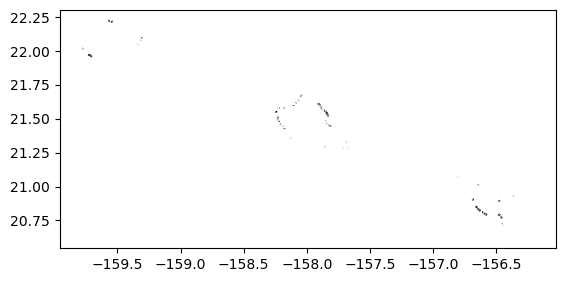

In [61]:
data18 = gpd.read_file('data/slr potential flooded highways/2.0ft/SLR_Potential_Flooded_Highways_-_2.0_Ft._Scenario')
data18.plot(alpha=1, color='black', edgecolor='black')

### Sewer Main Oahu Data

Downloaded from: https://honolulu-cchnl.opendata.arcgis.com/datasets/sewer-mains/explore?location=21.315437%2C-158.094275%2C15.00

* `Description`: Main sewer lines in Oahu updated December 19, 2023
* `Source`:  HonoluluGIS Office - HOLIS City & County of Honolulu GIS
* `Lowest Geographic Scale`: Latitute, Longitude; Address
* `Data formats available`: csv, geojson, kml,shapefile



In [62]:
data19 = pd.read_csv('data/sewer main/Sewer_-_Mains.csv')
data19.head(3)

,OBJECTID,ENABLED,SEWERID,ASSETID,BASINID,PROJECTID,STATUS,OWNER,DATEINSTALLED,DATEDIGITIZED,...,ESMT,HAZARD,MATERIAL,REHAB,DIAMETER,UPINVERT,DOWNINVERT,NEIGHBORHOOD,INSIDE_DIA,SHAPE_Length
0,1,1,458304,C-458304,SI,2296,ACT,CITY,1956/03/15 00:00:01+00,1990/09/30 00:00:00+00,...,NO,NO,VCP,NONE,8.0,125.23,107.71,Waialae-Kahala,NaN,0.000409
1,2,1,458507,C-458507,SI,2285,ACT,CITY,1956/04/01 00:00:01+00,1990/09/30 00:00:00+00,...,YES,NO,VCP,NONE,12.0,44.40,44.06,Waialae-Kahala,NaN,0.000224
2,3,1,458558,C-458558,SI,2243,ACT,CITY,1959/07/01 00:00:01+00,1990/09/30 00:00:00+00,...,YES,NO,VCP,NONE,8.0,26.50,25.42,Kuliouou-Kalani Iki,NaN,0.000751


In [63]:
data20 = gpd.read_file('data/sewer main/Sewer_-_Mains.geojson')
data20.head(3)

,OBJECTID,ENABLED,SEWERID,ASSETID,BASINID,PROJECTID,STATUS,OWNER,DATEINSTALLED,DATEDIGITIZED,...,HAZARD,MATERIAL,REHAB,DIAMETER,UPINVERT,DOWNINVERT,NEIGHBORHOOD,INSIDE_DIA,SHAPE_Length,geometry
0,1,1,458304,C-458304,SI,2296,ACT,CITY,1956-03-15 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,8.0,125.23,107.71,Waialae-Kahala,NaN,0.000409,"MULTILINESTRING ((-157.77784 21.28059, -157.77..."
1,2,1,458507,C-458507,SI,2285,ACT,CITY,1956-04-01 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,12.0,44.40,44.06,Waialae-Kahala,NaN,0.000224,"MULTILINESTRING ((-157.77931 21.27842, -157.77..."
2,3,1,458558,C-458558,SI,2243,ACT,CITY,1959-07-01 00:00:01+00:00,1990-09-30 00:00:00+00:00,...,NO,VCP,NONE,8.0,26.50,25.42,Kuliouou-Kalani Iki,NaN,0.000751,"MULTILINESTRING ((-157.78048 21.27741, -157.78..."


<Axes: >

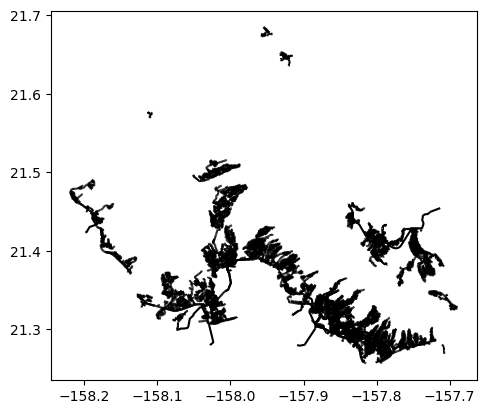

In [64]:
data21 = gpd.read_file('data/sewer main/Sewer_-_Mains')
data21.plot(alpha=1, color='black', edgecolor='black')